### Read RBR data without Ruskin program

The RBR raw data in .rsk files is a SQLite file - well described and readable without the need for proprietary software.  

Can we open, read and plot the RBR data (and perform and unit conversions) without the software?  The software does internal calcaluations of Salinity and Pressure corrections as well as possibly calibration corrections?

*** This is just a test and proof of concept ***


In [96]:
%matplotlib inline
import matplotlib.pyplot as plt

In [54]:
import sqlite3
import pandas as pd

In [55]:
data_file = 'data/DY1805cast050.rsk'
db = sqlite3.connect(data_file)

query = 'SELECT * FROM channels'
columns = pd.read_sql_query(query,db)

In [56]:
query = 'SELECT * FROM data'

df_r = pd.read_sql_query(query,db)

In [57]:
columns

,channelID,shortName,longName,units,longNamePlainText,unitsPlainText,isMeasured,isDerived
0,1,cond10,Conductivity,mS/cm,Conductivity,mS/cm,1,0
1,2,temp14,Temperature,°C,Temperature,Degrees_C,1,0
2,3,pres24,Pressure,dbar,Pressure,dbar,1,0
3,4,pres08,Sea pressure,dbar,Sea pressure,dbar,0,1
4,5,dpth01,Depth,m,Depth,m,0,1
5,6,sal_00,Salinity,PSU,Salinity,PSU,0,1
6,7,sos_00,Speed of sound,m/s,Speed of sound,m/s,0,1
7,8,scon00,Specific conductivity,µS/cm,Specific conductivity,uS/cm,0,1
8,9,temp22,Temperature,°C,Temperature,Degrees_C,1,0
9,10,temp10,Temperature,°C,Temperature,Degrees_C,1,0


In [58]:
df_r.head()

,tstamp,channel01,channel02,channel03,channel09,channel10
0,1525899599000,-0.000055,3.756087,9.945971,4.105842,4.361718
1,1525899599125,-0.000212,3.761042,9.937022,3.937254,4.362148
2,1525899599250,-0.000283,3.766197,9.939225,4.105842,4.362535
3,1525899599375,-0.000359,3.769952,9.934484,4.105842,4.362747
4,1525899599500,0.000271,3.770283,9.931353,4.063758,4.363037


### Given the raw data above, can we calculate salinity using the thermodynamic equation of state and how does that compare to the RBR Ruskin Processed Data?

In [59]:
import seawater

In [60]:
conductivity = df_r.channel01
temperature = df_r.channel02
pressure = df_r.channel03 - 10.1325 #subtract standard atmosphere

df_r['salinity'] = seawater.salt(conductivity/42.914,temperature,pressure)

/Users/bell/anaconda2/envs/py36/lib/python3.6/site-packages/seawater/library.py:363: RuntimeWarning: invalid value encountered in sqrt
  Rtx = (rt) ** 0.5


In [70]:
df_e = pd.read_excel('data/DY1805cast050.xlsx','Data',skiprows=1)

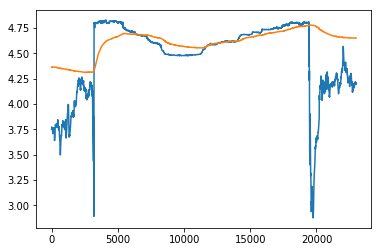

In [110]:
temperature.plot()
#df['channel09'].plot()
df['channel10'].plot() #smoothed version of channel09

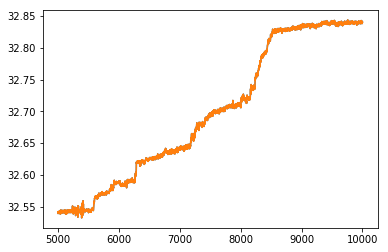

In [75]:
df_e.Salinity[5000:10000].plot()
df_r.salinity[5000:10000].plot()

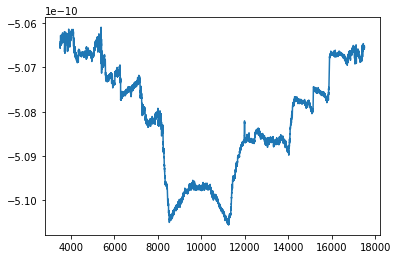

In [95]:
saldiff = (df_r.salinity - df_e.Salinity)
saldiff[3500:17500].plot()

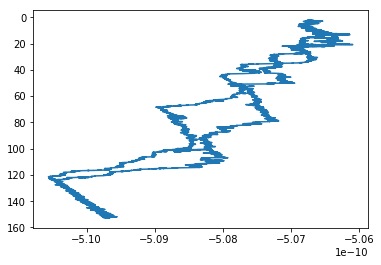

In [104]:
plt.plot(saldiff[3500:17500],df_e.Depth[3500:17500])
ax = plt.gca()
ax.invert_yaxis()